In [1]:
import scanpy as sc
import numpy as np
from matplotlib import rcParams
#import matplotlib.pyplot as pl

#import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1


In [3]:
adata = sc.read_loom('/Volumes/groups/cochella/git_aleks_jingkui/scRNAseq_MS_lineage/results_jiwang/results/all_batches_20191115/Seurat_tmp.loom', sparse=True, cleanup=False, X_name='SCT', obs_names='CellID', var_names='Gene', dtype='float32')

/Users/jiwang/anaconda3/lib/python3.7/site-packages/loompy/loom_layer.py:116: RuntimeWarning: invalid value encountered in greater
  nonzeros = np.where(vals > 0)


In [4]:
adata

AnnData object with n_obs × n_vars = 4385 × 10046 
    obs: 'BSC', 'BSC_log2', 'ClusterID', 'ClusterName', 'FSC', 'FSC_log2', 'GFP', 'SCT_snn_res_6', 'barcodes', 'flowcell_lane', 'library_size', 'nCount_SCT', 'nFeature_SCT', 'request', 'sampleIDs', 'samples', 'seqInfos', 'seurat_clusters', 'timingEst', 'timingEst_group', 'timingEst_sd', 'timingEst_sd_group', 'use'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    obsm: 'mnn_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'umap_mnn_cell_embeddings'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:23)


... storing 'ClusterName' as categorical
... storing 'SCT_snn_res_6' as categorical
... storing 'barcodes' as categorical
... storing 'flowcell_lane' as categorical
... storing 'request' as categorical
... storing 'sampleIDs' as categorical
... storing 'seqInfos' as categorical
... storing 'seurat_clusters' as categorical
... storing 'timingEst' as categorical
... storing 'timingEst_group' as categorical
... storing 'timingEst_sd_group' as categorical


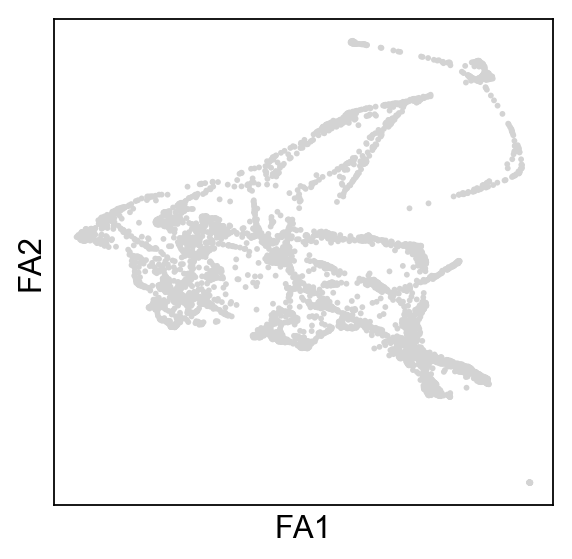

In [5]:
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 20, use_rep='pca_cell_embeddings')
#sc$tl$leiden(adata, resolution = 1.0)
sc.tl.draw_graph(adata)



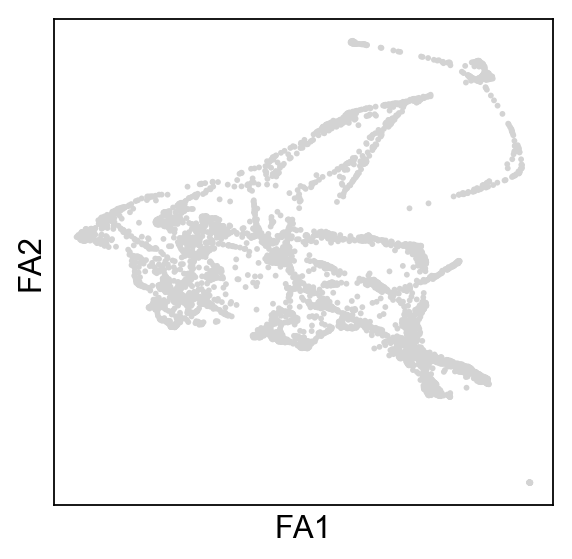

In [6]:
sc.pl.draw_graph(adata)


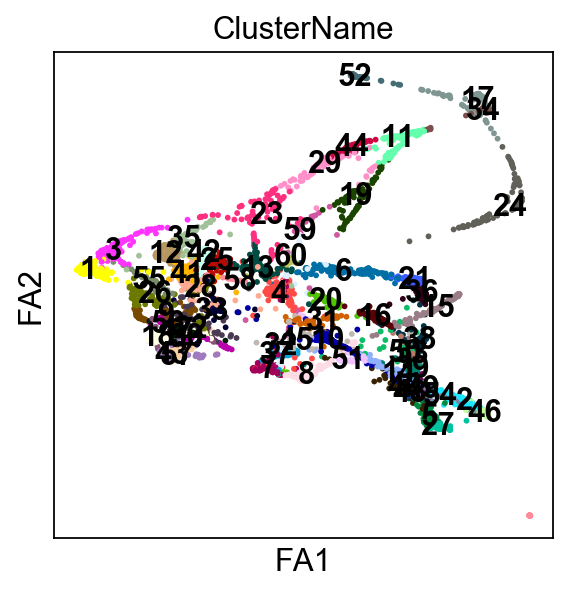

In [9]:
sc.pl.draw_graph(adata, color='ClusterName', legend_loc='on data')

In [7]:
sc.tl.paga(adata, groups='ClusterName')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


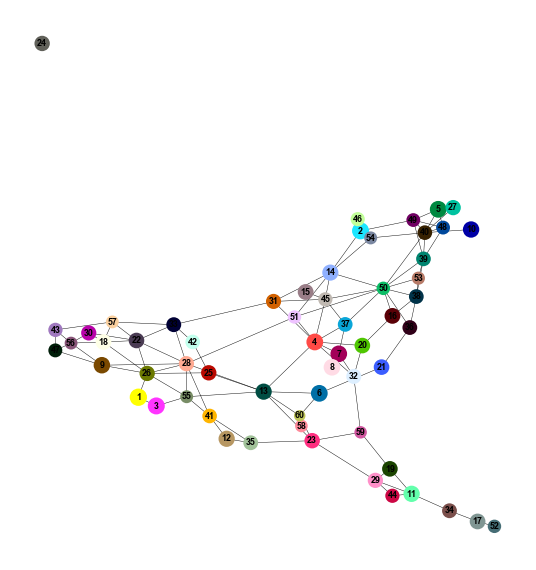

In [10]:
#plt.figure()
sc.pl.paga(adata, threshold=0.7, layout='fa', frameon=False, fontsize=4, node_size_scale=0.3, max_edge_width=0.2, save = 'paga_test.pdf')


In [12]:
sc.tl.umap(adata)

computing UMAP


/Users/jiwang/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


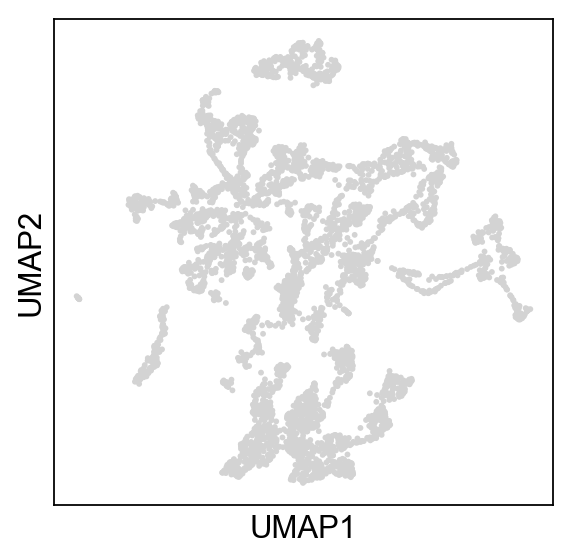

In [13]:
sc.pl.umap(adata)